In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("INCOME.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


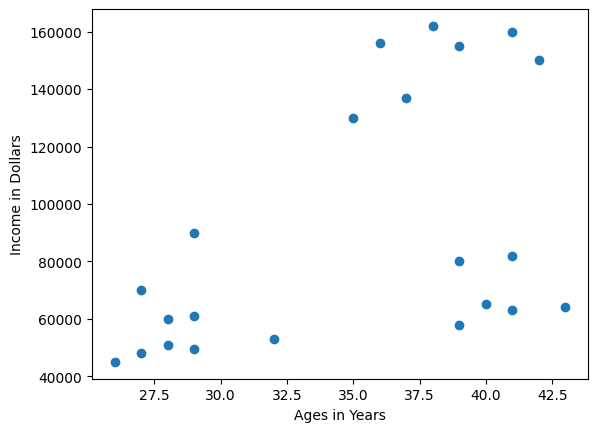

In [4]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel("Ages in Years")
plt.ylabel("Income in Dollars")
plt.show()

In [7]:
# Applying Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df[['Age','Income($)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
y_pred = model.fit_predict(df[['Age','Income($)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [11]:
df['clusters'] = y_pred

In [12]:
df.shape

(22, 4)

In [13]:
df.sample(5)

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
9,Angelina,0.529412,0.726496,1
21,Abdul,0.764706,0.111111,2
17,Priyanka,0.882353,0.153846,2
5,Gautam,0.764706,0.940171,1


In [17]:
df1 = df[df['clusters']==0]
df2 = df[df['clusters']==1]
df3 = df[df['clusters']==2]

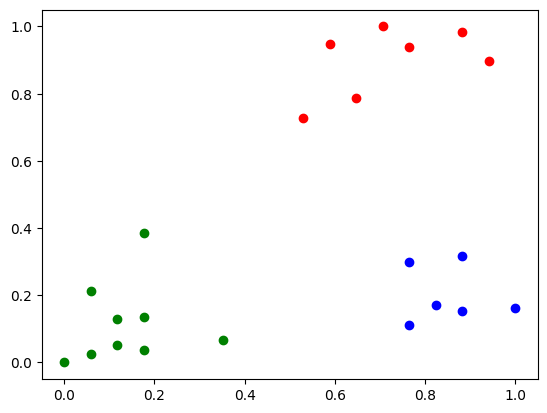

In [18]:
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')

In [19]:
sse = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)
print(sse)

[5.434011511988178, 2.091136388699078, 0.4750783498553096, 0.3491047094419566, 0.2766936276300279, 0.2187801089333045, 0.16869711728567788, 0.14391444958090926, 0.10188787724979426, 0.07996937425152906]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

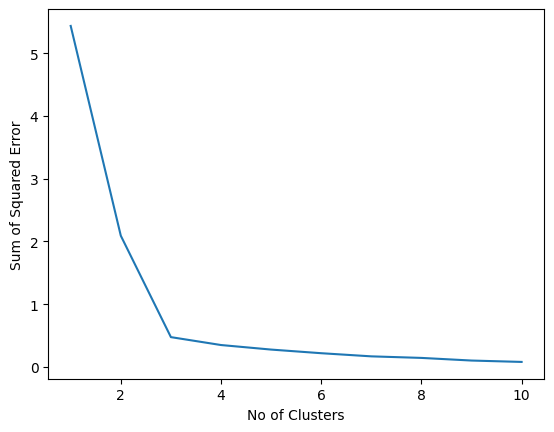

In [20]:
k = range(1,11)
plt.plot(k,sse)
plt.xlabel("No of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()